In [1]:
import numpy as np
import pandas as pd
import pyampute
from pyampute.ampute import MultivariateAmputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression

import statsmodels.api as sm

In [6]:
X_full = np.genfromtxt(os.path.basename('/Desktop/GIT/Imputations/data_ivanovo.csv') , delimiter=';', skip_header=2)
df = pd.DataFrame(X_full)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,3.0,0.0,0.0,1.0,0.0,0.681272,0.839077,1.699830,0.780747,1.965416,2.297007,-0.619881,-0.906753,1.710877,1.080780,0.195906,-0.762807
1,2.0,1.0,0.0,1.0,1.0,0.0,1.465668,1.619690,1.556676,2.193946,1.396400,-0.673438,1.092172,-0.193068,0.172220,0.592126,1.120988,0.020496
2,1.0,1.0,0.0,1.0,1.0,1.0,-1.584760,-0.790098,-1.020090,-0.475431,-1.069334,-1.267527,-1.400506,-1.412281,-0.606606,-2.146019,0.000772,1.699002
3,2.0,1.0,0.0,0.0,0.0,0.0,1.117047,1.467215,1.914561,1.304154,1.111892,0.910800,0.045425,0.936935,0.020254,-0.022903,0.058590,-0.091404
4,2.0,1.0,0.0,0.0,1.0,0.0,0.506962,2.299204,1.771407,0.519043,0.732548,-0.574423,1.730865,-1.114912,0.789582,1.266131,-0.136545,1.251401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,1.0,1.0,0.0,0.0,0.0,0.0,-0.887519,-0.280463,0.339870,-0.789475,-0.595155,-0.178363,0.453479,-0.490437,-0.331168,0.137173,-0.273861,0.468098
1879,1.0,2.0,0.0,0.0,0.0,0.0,-0.713209,-0.280463,-0.053802,-0.946497,-1.164170,-1.366541,0.151873,1.501937,-0.141210,0.389925,-0.729175,0.132397
1880,1.0,1.0,0.0,0.0,0.0,0.0,-0.364589,0.414796,-0.018014,-0.266068,-0.215811,-1.366541,-0.398112,-1.560966,-0.036733,-0.840134,-0.042591,1.475201
1881,1.0,1.0,0.0,1.0,0.0,0.0,-1.148984,-0.756122,-0.161168,-0.475431,-0.026139,0.019666,0.613152,0.520618,0.457157,0.802753,-0.317224,0.132397


In [7]:
df_cont = df.iloc[:, 6:18]
df_cont.columns = [str(i) for i in range(df_cont.shape[1])]
df_cont

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.681272,0.839077,1.699830,0.780747,1.965416,2.297007,-0.619881,-0.906753,1.710877,1.080780,0.195906,-0.762807
1,1.465668,1.619690,1.556676,2.193946,1.396400,-0.673438,1.092172,-0.193068,0.172220,0.592126,1.120988,0.020496
2,-1.584760,-0.790098,-1.020090,-0.475431,-1.069334,-1.267527,-1.400506,-1.412281,-0.606606,-2.146019,0.000772,1.699002
3,1.117047,1.467215,1.914561,1.304154,1.111892,0.910800,0.045425,0.936935,0.020254,-0.022903,0.058590,-0.091404
4,0.506962,2.299204,1.771407,0.519043,0.732548,-0.574423,1.730865,-1.114912,0.789582,1.266131,-0.136545,1.251401
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,-0.887519,-0.280463,0.339870,-0.789475,-0.595155,-0.178363,0.453479,-0.490437,-0.331168,0.137173,-0.273861,0.468098
1879,-0.713209,-0.280463,-0.053802,-0.946497,-1.164170,-1.366541,0.151873,1.501937,-0.141210,0.389925,-0.729175,0.132397
1880,-0.364589,0.414796,-0.018014,-0.266068,-0.215811,-1.366541,-0.398112,-1.560966,-0.036733,-0.840134,-0.042591,1.475201
1881,-1.148984,-0.756122,-0.161168,-0.475431,-0.026139,0.019666,0.613152,0.520618,0.457157,0.802753,-0.317224,0.132397


# Full

In [4]:
cols_df1 = ['5','6','10', '11']
df_1 = df_cont[cols_df1]
df_1

,5,6,10,11
0,2.297007,-0.619881,0.195906,-0.762807
1,-0.673438,1.092172,1.120988,0.020496
2,-1.267527,-1.400506,0.000772,1.699002
3,0.910800,0.045425,0.058590,-0.091404
4,-0.574423,1.730865,-0.136545,1.251401
...,...,...,...,...
1878,-0.178363,0.453479,-0.273861,0.468098
1879,-1.366541,0.151873,-0.729175,0.132397
1880,-1.366541,-0.398112,-0.042591,1.475201
1881,0.019666,0.613152,-0.317224,0.132397


In [5]:
full_ols = sm.OLS(df_1.iloc[:,3], df_1.iloc[:, 0:3])
full_ols_result = full_ols.fit()
full_ols_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     11   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.017
Method:                 Least Squares   F-statistic:                              11.93
Date:                Sun, 30 Oct 2022   Prob (F-statistic):                    9.70e-08
Time:                        08:58:39   Log-Likelihood:                         -2617.7
No. Observations:                1858   AIC:                                      5241.
Df Residuals:                    1855   BIC:                                      5258.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
5              0.0076      0.023      0.323      0.747      -0.038       0.053
6              0.0949      0.023      4.105      0.000       0.050       0.140
10             0.0883      0.023      3.765      0.000       0.042       0.134
==============================================================================
Omnibus:                      136.098   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.589
Skew:                           0.655   Prob(JB):                     2.02e-38
Kurtosis:                       3.727   Cond. No.                         1.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
df_1_coefs = full_ols_result.params
df_1_coefs

5     0.007558
6     0.094897
10    0.088348
dtype: float64

In [7]:
df_1_vars = full_ols_result.bse
df_1_vars

5     0.023423
6     0.023115
10    0.023466
dtype: float64

Text(0.5, 1.0, "Original df_1's coefficeints of the linear regression and their variances pooled")

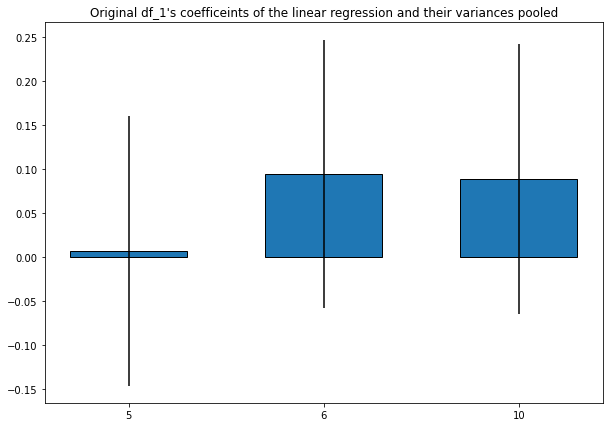

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.bar(x=cols_df1[0:3], 
       height=df_1_coefs, 
       width=0.6, 
       yerr = np.sqrt(df_1_vars), 
       alpha=1,  
       edgecolor='black')
plt.title("Original df_1's coefficeints of the linear regression and their variances pooled")
# plt.savefig(f"figures/rubin_pooling_{p_mech}_{p_miss}_MEAN.png", dpi=200)

In [9]:
tt0 = np.linspace(min(df_1.iloc[:,0]), max(df_1.iloc[:,0]), 1000)

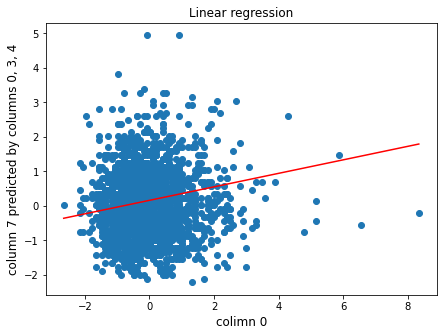

In [10]:
#Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df_1.iloc[:,0], df_1.iloc[:,3])
tt0 = np.linspace(min(df_1.iloc[:,0]), max(df_1.iloc[:,0]), 1000)
tt1 = np.linspace(min(df_1.iloc[:,1]), max(df_1.iloc[:,1]), 1000)
tt2 = np.linspace(min(df_1.iloc[:,2]), max(df_1.iloc[:,2]), 1000)
plt.plot(tt0, df_1_coefs[0] * tt0 + df_1_coefs[1] * tt1 + df_1_coefs[2] * tt2, c='r')
#On ajoute les titres des axes
plt.xlabel("colimn 0", fontsize = 12)
plt.ylabel("column 7 predicted by columns 0, 3, 4", fontsize = 12)
plt.title("Linear regression")

plt.show()

# MICE

In [11]:
n_imputations = 5
test_size = 0.2
pr = 0.4
mecha = 'MAR'

ma = MultivariateAmputation(
        patterns = [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"}],
        prop = pr
    )
X_miss = ma.fit_transform(df_1) #MAR!!

In [12]:
X_miss

,5,6,10,11
0,2.297007,-0.619881,0.195906,-0.762807
1,NaN,NaN,1.120988,0.020496
2,NaN,NaN,0.000772,1.699002
3,0.910800,0.045425,0.058590,-0.091404
4,-0.574423,1.730865,-0.136545,1.251401
...,...,...,...,...
1878,-0.178363,0.453479,-0.273861,0.468098
1879,-1.366541,0.151873,-0.729175,0.132397
1880,NaN,NaN,-0.042591,1.475201
1881,0.019666,0.613152,-0.317224,0.132397


In [13]:
df_CC = X_miss.copy()
df_CC.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

CC_ols = sm.OLS(df_CC.iloc[:,3], df_CC.iloc[:, 0:3])
CC_ols_result = CC_ols.fit()
df_1_CC_coef = CC_ols_result.params
df_1_CC_vars = CC_ols_result.bse

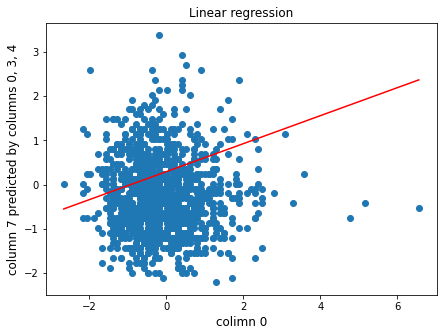

In [14]:
#Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df_CC.iloc[:,0], df_CC.iloc[:,3])
tt0 = np.linspace(min(df_CC.iloc[:,0]), max(df_CC.iloc[:,0]), 1000)
tt1 = np.linspace(min(df_CC.iloc[:,1]), max(df_CC.iloc[:,1]), 1000)
tt2 = np.linspace(min(df_CC.iloc[:,2]), max(df_CC.iloc[:,2]), 1000)
plt.plot(tt0, df_1_CC_coef[0] * tt0 + df_1_CC_coef[1] * tt1 + df_1_CC_coef[2] * tt2, c='r')
#On ajoute les titres des axes
plt.xlabel("colimn 0", fontsize = 12)
plt.ylabel("column 7 predicted by columns 0, 3, 4", fontsize = 12)
plt.title("Linear regression")

plt.show()

Text(0.5, 1.0, 'df_1 w/ CC coefficeints of the linear regression and their variances pooled')

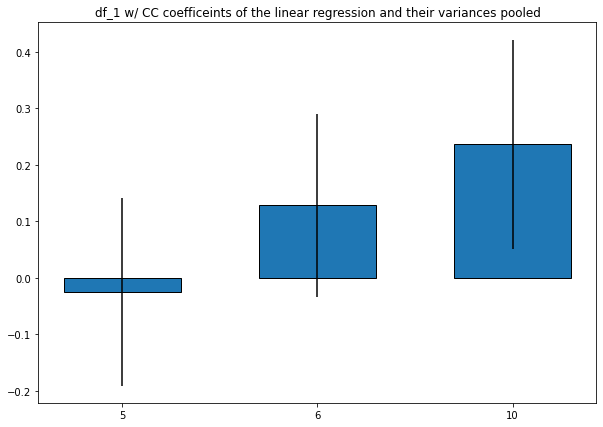

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.bar(x=cols_df1[0:3], 
       height=df_1_CC_coef, 
       width=0.6, 
       yerr = np.sqrt(df_1_CC_vars), 
       alpha=1,  
       edgecolor='black')
plt.title("df_1 w/ CC coefficeints of the linear regression and their variances pooled")
# plt.savefig(f"figures/rubin_pooling_{p_mech}_{p_miss}_MEAN.png", dpi=200)

In [16]:
def rubins_pooling_rules(m_coefs, m_vars_coefs):
    """Applies Rubin's pooling rules.
    The final weights is defined as the mean of the weights across the imputed
    datasets while the total variance is defined as the combination of the mean
    of the variance of the weights and the variance of the coefficients.
    Parameters
    ----------
    m_coefs : ndarray, shape (n_imputations, n_features)
        The weights of the model fitted on each imputed dataset.
    m_vars_coefs : ndarray, shape (n_imputations, n_features)
        An estimate of the variance of the weights on each imputed dataset.
    Returns
    -------
    mean_coefs : ndarray, shape (n_features,)
        The mean coefficients computed across the imputed datasets.
    total_var_coefs : ndarray, shape (n_features,)
        An estimate of the total variation of the weights across the imputed
        datasets.
    """
    mean_coefs = np.mean(m_coefs, axis=0)
    mean_vars_coefs = np.mean(m_vars_coefs, axis=0)
    vars_coefs = np.var(m_coefs, axis=0, ddof=1)
    total_var_coefs = mean_vars_coefs + (1 + 1 / vars_coefs.shape[0]) * vars_coefs
    return mean_coefs, total_var_coefs


In [17]:
m_coefs = []
m_vars = []
imp_mice = []

for i in range(n_imputations):
    imp = IterativeImputer(max_iter = 50, random_state = i, sample_posterior = True, estimator = BayesianRidge()).fit_transform(X_miss)
    imp_mice.append(imp)
    imp = pd.DataFrame(imp)

    MICE_clf = sm.OLS(imp.iloc[:,3], imp.iloc[:, 0:3])
    MICE_clf_result = MICE_clf.fit()
    
    m_coefs.append(MICE_clf_result.params)
    m_vars.append(MICE_clf_result.bse)

MICE_coefs = np.array(m_coefs)
MICE_vars = np.array(m_vars)
mice_df = np.array(imp_mice).mean(axis=0)
mice_df = pd.DataFrame(mice_df)

In [18]:
X_miss

,5,6,10,11
0,2.297007,-0.619881,0.195906,-0.762807
1,NaN,NaN,1.120988,0.020496
2,NaN,NaN,0.000772,1.699002
3,0.910800,0.045425,0.058590,-0.091404
4,-0.574423,1.730865,-0.136545,1.251401
...,...,...,...,...
1878,-0.178363,0.453479,-0.273861,0.468098
1879,-1.366541,0.151873,-0.729175,0.132397
1880,NaN,NaN,-0.042591,1.475201
1881,0.019666,0.613152,-0.317224,0.132397


In [19]:
MICE_coefs

array([[-0.00079845,  0.14995216,  0.10233179],
       [ 0.00938685,  0.144009  ,  0.10168634],
       [ 0.01083095,  0.15172818,  0.09566657],
       [ 0.03364645,  0.17521358,  0.08455001],
       [ 0.02934718,  0.12439557,  0.0824768 ]])

In [20]:
mice_means = rubins_pooling_rules(MICE_coefs, MICE_vars)[0]
mice_varis = rubins_pooling_rules(MICE_coefs, MICE_vars)[1]

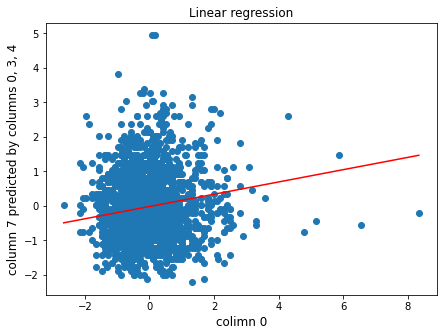

In [21]:
#Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(mice_df.iloc[:,0], mice_df.iloc[:,3])
tt0 = np.linspace(min(mice_df.iloc[:,0]), max(mice_df.iloc[:,0]), 1000)
tt1 = np.linspace(min(mice_df.iloc[:,1]), max(mice_df.iloc[:,1]), 1000)
tt2 = np.linspace(min(mice_df.iloc[:,2]), max(mice_df.iloc[:,2]), 1000)
plt.plot(tt0, mice_means[0] * tt0 + mice_means[1] * tt1 + mice_means[2] * tt2, c='r')
#On ajoute les titres des axes
plt.xlabel("colimn 0", fontsize = 12)
plt.ylabel("column 7 predicted by columns 0, 3, 4", fontsize = 12)
plt.title("Linear regression")

plt.show()

In [22]:
mice_means

array([0.01648259, 0.1490597 , 0.0933423 ])

Text(0.5, 1.0, 'df_1 w/ MICE coefficeints of the linear regression and their variances pooled')

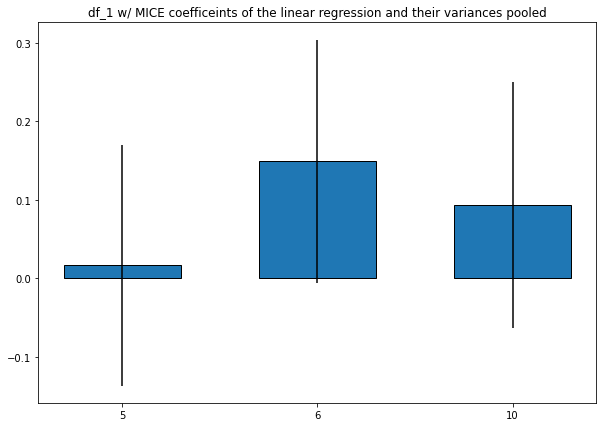

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.bar(x=cols_df1[0:3], 
       height= mice_means, 
       width=0.6, 
       yerr = np.sqrt(mice_varis), 
       alpha=1,  
       edgecolor='black')
plt.title("df_1 w/ MICE coefficeints of the linear regression and their variances pooled")
# plt.savefig(f"figures/rubin_pooling_{p_mech}_{p_miss}_MEAN.png", dpi=200)

Text(0.5, 1.0, 'df_1 w/ MICE coefficeints of the linear regression and their variances pooled')

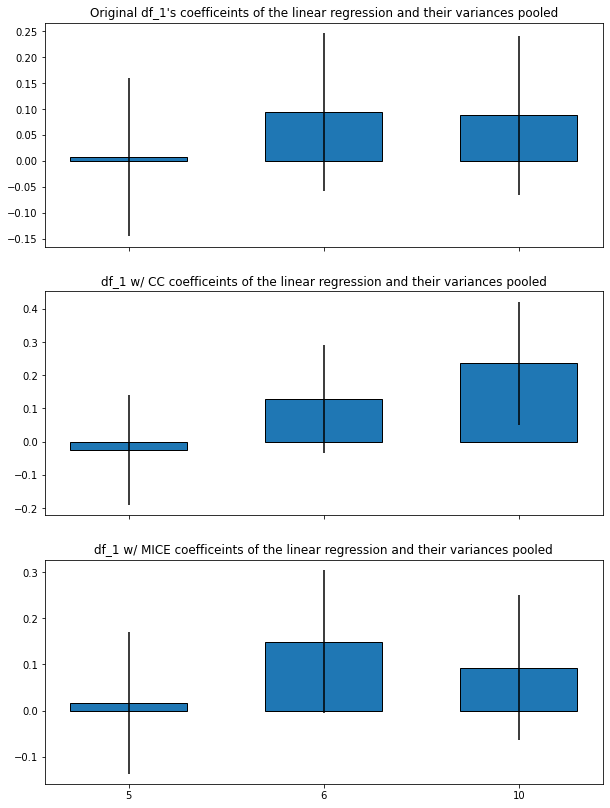

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(10, 14), sharex=True)

ax[0].bar(x=cols_df1[0:3], 
       height=df_1_coefs, 
       width=0.6, 
       yerr = np.sqrt(df_1_vars), 
       alpha=1,  
       edgecolor='black')
ax[0].set_title("Original df_1's coefficeints of the linear regression and their variances pooled")

ax[1].bar(x=cols_df1[0:3], 
       height=df_1_CC_coef, 
       width=0.6, 
       yerr = np.sqrt(df_1_CC_vars), 
       alpha=1,  
       edgecolor='black')
ax[1].set_title("df_1 w/ CC coefficeints of the linear regression and their variances pooled")

ax[2].bar(x=cols_df1[0:3], 
       height= mice_means, 
       width=0.6, 
       yerr = np.sqrt(mice_varis), 
       alpha=1,  
       edgecolor='black')
ax[2].set_title("df_1 w/ MICE coefficeints of the linear regression and their variances pooled")

# Function (all together)